<p>PT-BR</p>

# Etapa 1: Limpando e explorando dados categóricos

## Cartão de Crédito: Será que irá entrar em inadimplência?

<p>Baseado em dados fictícios, o objetivo desse notebook é realizar uma análise exploratória com base nos dados de cartões de crédito de clientes dos últimos seis meses e, com base nisso, criar um modelo preditivo de ML capaz nos indicar se no próximo mês um cliente entrará em inadimplência.</p><br><br>



<p>EN-US</p>

## Credit card: Will it default? 

<p>Based on ficticional data, this notebook's objective is to make a exploratory data analises with data from ficticional clients credit cards of the last six months and, with it, create a predictive ML model capable of predict if a client will default or not on the next month.</p>

#### 1. Análise de integridade dos dados
Antes mesmo de iniciar a análise exploratória, precisamos verificar se nossos dados são integros, isso é, se possuímos valores unicos e que estejam todos preenchidos para fazer sentido em nossas análises exploratórias.

In [1]:
# Importação da biblioteca pandas e leitura dos dados em um .xls
import pandas as pd
import numpy as np

df = pd.read_excel('/home/jhonatatirlonidev/Data science/Data/default_of_credit_card_clients__courseware_version_1_21_19.xls')

In [2]:
print('Total de linhas/samples: ', len(df.index))
print('Total de colunas/features: ', len(df.columns))

Total de linhas/samples:  30000
Total de colunas/features:  25


In [3]:
# Julgando pela quantidade de linhas e colunas, acredito que cada linha corresponda a um cliente! 
# Vamos visualizar uma mostra da tabela para entender melhor.

df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,798fc410-45c1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,8a8c8f3b-8eb4,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,85698822-43f5,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,0737c11b-be42,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,3b7f77cc-dbc0,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
# Agora, sabemos que cada linha corresponde a um único cliente. 
# Outro importante passo é entendermos quais variáveis são categórias (representam sim, não, talvez, etc) e
# quais são númericas (representam quantidades, valores, somas etc)

for column in df:
    print("Coluna "+str(column)+": "+str(df[column].unique())+" \n")

Coluna ID: ['798fc410-45c1' '8a8c8f3b-8eb4' '85698822-43f5' ... '95cdd3e7-4f24'
 '00d03f02-04cd' '15d69f9f-5ad3'] 

Coluna LIMIT_BAL: [  20000  120000   90000   50000  500000  100000  140000  200000  260000
  630000   70000  250000  320000  360000  180000  130000  450000   60000
  230000  160000  280000   10000   40000  210000  150000  380000  310000
  400000   80000  290000  340000  300000   30000  240000  470000  480000
  350000  330000  110000  420000  170000  370000  270000  220000  190000
       0  510000  460000  440000  410000  490000  390000  580000  600000
  620000  610000  700000  670000  680000  430000  550000  540000 1000000
  530000  710000  560000  520000  750000  640000   16000  570000  590000
  660000  720000  327680  740000  800000  760000  690000  650000  780000
  730000] 

Coluna SEX: [2 1 0] 

Coluna EDUCATION: [2 1 3 5 0 4 6] 

Coluna MARRIAGE: [1 2 3 0] 

Coluna AGE: [24 26 34 37 57 29 23 28 35 51 41 30 49 39 40 27 47 33 32 54 58 22 25 31
 46 42 43 45 56 44 53 38 

In [5]:
# Das colunas acima, podemos anotar o seguinte:
print("ID: Categórica \n LIMIT_BAL: Númerico, total de crédito concedido incluindo crédito pessoal individual e familiar; \n SEX: Categórica, sexo do cliente; \n EDUCATION: Categórica, nível educacional do cliente; \n MARRIAGE: Categórica, status matrimonial do cliente; \n AGE: Númerica, idade do cliente \n PAY_1,2,3,4,5 e 6: Categóricas, indica se o cliente pagou entre abril a setembro. Negativo significa pago em dias \n BILL_AMT1,2,3,4,5 e 6: Númerica, valor devido \n PAY_AMT1,2,3,4,5 e 6: Númerica, total pago")

ID: Categórica 
 LIMIT_BAL: Númerico, total de crédito concedido incluindo crédito pessoal individual e familiar; 
 SEX: Categórica, sexo do cliente; 
 EDUCATION: Categórica, nível educacional do cliente; 
 MARRIAGE: Categórica, status matrimonial do cliente; 
 AGE: Númerica, idade do cliente 
 PAY_1,2,3,4,5 e 6: Categóricas, indica se o cliente pagou entre abril a setembro. Negativo significa pago em dias 
 BILL_AMT1,2,3,4,5 e 6: Númerica, valor devido 
 PAY_AMT1,2,3,4,5 e 6: Númerica, total pago


In [6]:
# A nossa coluna ID vai nos ser muito útil, vamos ver se tem apenas registros exclusivos mesmo?
df['ID'].nunique()

29687

In [7]:
# Julgando que temos um dataset de trina mil linhas e apenas 29687 são únicos quer dizer que temos algumas duplicadas.
# Vamos ver quais são?
id_counts = df['ID'].value_counts()
id_counts.head()

ad23fe5c-7b09    2
1fb3e3e6-a68d    2
89f8f447-fca8    2
7c9b7473-cc2f    2
90330d02-82d9    2
Name: ID, dtype: int64

In [8]:
id_counts.value_counts()

1    29374
2      313
Name: ID, dtype: int64

In [9]:
# Como temos uma pequena quantidade de duplicados apenas, vamos remove-los para continuar.
dup_mask = id_counts == 2
dup_mask[:5]

ad23fe5c-7b09    True
1fb3e3e6-a68d    True
89f8f447-fca8    True
7c9b7473-cc2f    True
90330d02-82d9    True
Name: ID, dtype: bool

In [10]:
dup_ids = id_counts.index[dup_mask]
dup_ids = list(dup_ids)
len(dup_ids)

313

In [11]:
# Acima criamos uma lista com o index de todos os ids duplicados.
# Antes de dropar, vamos verificar o por que desses registros duplicados?
df.loc[df['ID'].isin(dup_ids[0:3]), :]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
5033,89f8f447-fca8,320000,2,2,1,32,0,0,0,0,...,169371,172868,150827,8000,8000,5500,6100,6000,5000,0
5133,89f8f447-fca8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16727,1fb3e3e6-a68d,80000,1,2,2,33,2,2,0,0,...,27394,29922,31879,0,2000,2000,3000,2600,0,1
16827,1fb3e3e6-a68d,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29685,ad23fe5c-7b09,50000,1,3,1,32,0,0,0,0,...,12882,8131,3983,3000,2871,1000,163,3983,3771,1
29785,ad23fe5c-7b09,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [12]:
# Aparentemente, a duplicada de cada linha é uma linha preenchida apenas com zeros, e a outra possui dados válidos.
# Vamos criar uma nova variável sem estes dados então

df_clean_1 = df.loc[(df['SEX'] != 0)].copy()
df_clean_1['ID'].nunique()

29685

In [13]:
# Agora sim, tudo certo! Finalmente, vamos pra análise exploratória e realizar algumas limpezas também.

### 2. AED - Análise exploratória de dados
Agora sim! Vamos conhecer melhor nossos dados e partir para a análise exploratória deles.

In [14]:
# Vamos printar novamente nossas colunas e, agora, também os tipos das colunas.
df_clean_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29685 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          29685 non-null  object
 1   LIMIT_BAL                   29685 non-null  int64 
 2   SEX                         29685 non-null  int64 
 3   EDUCATION                   29685 non-null  int64 
 4   MARRIAGE                    29685 non-null  int64 
 5   AGE                         29685 non-null  int64 
 6   PAY_1                       29685 non-null  object
 7   PAY_2                       29685 non-null  int64 
 8   PAY_3                       29685 non-null  int64 
 9   PAY_4                       29685 non-null  int64 
 10  PAY_5                       29685 non-null  int64 
 11  PAY_6                       29685 non-null  int64 
 12  BILL_AMT1                   29685 non-null  int64 
 13  BILL_AMT2                   29685 non-null  in

In [15]:
# De todas as colunas, apenas duas não são numeros: ID (que já conhecemos) e PAY_1.
# VAmos ver o que é a PAY_1
df_clean_1['PAY_1'].head()

0     2
1    -1
2     0
3     0
4    -1
Name: PAY_1, dtype: object

In [16]:
# Estranhamente, aqui temos valores zerados que não fazem muito sentido. Vamos ver se tem outros valores estranhos
df_clean_1['PAY_1'].value_counts()

0                13087
-1                5047
1                 3261
Not available     3021
-2                2476
2                 2378
3                  292
4                   63
5                   23
8                   17
6                   11
7                    9
Name: PAY_1, dtype: int64

In [17]:
# Não é o mais otimizado, mas como ainda iremos ter bastante informação, vamos remover este "not availible" e
# mais pra frente veremos como lidar com isso.
df_clean_2 = df_clean_1.loc[(df_clean_1['PAY_1'] != "Not available")].copy()
df_clean_2.shape

(26664, 25)

In [18]:
# Tudo certo, pronto e bonito! Vamos plotar uns gráficos para entender melhor a estrutura dos dados?

import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
mpl.rcParams['figure.dpi'] = 400

array([[<AxesSubplot:title={'center':'LIMIT_BAL'}>,
        <AxesSubplot:title={'center':'AGE'}>]], dtype=object)

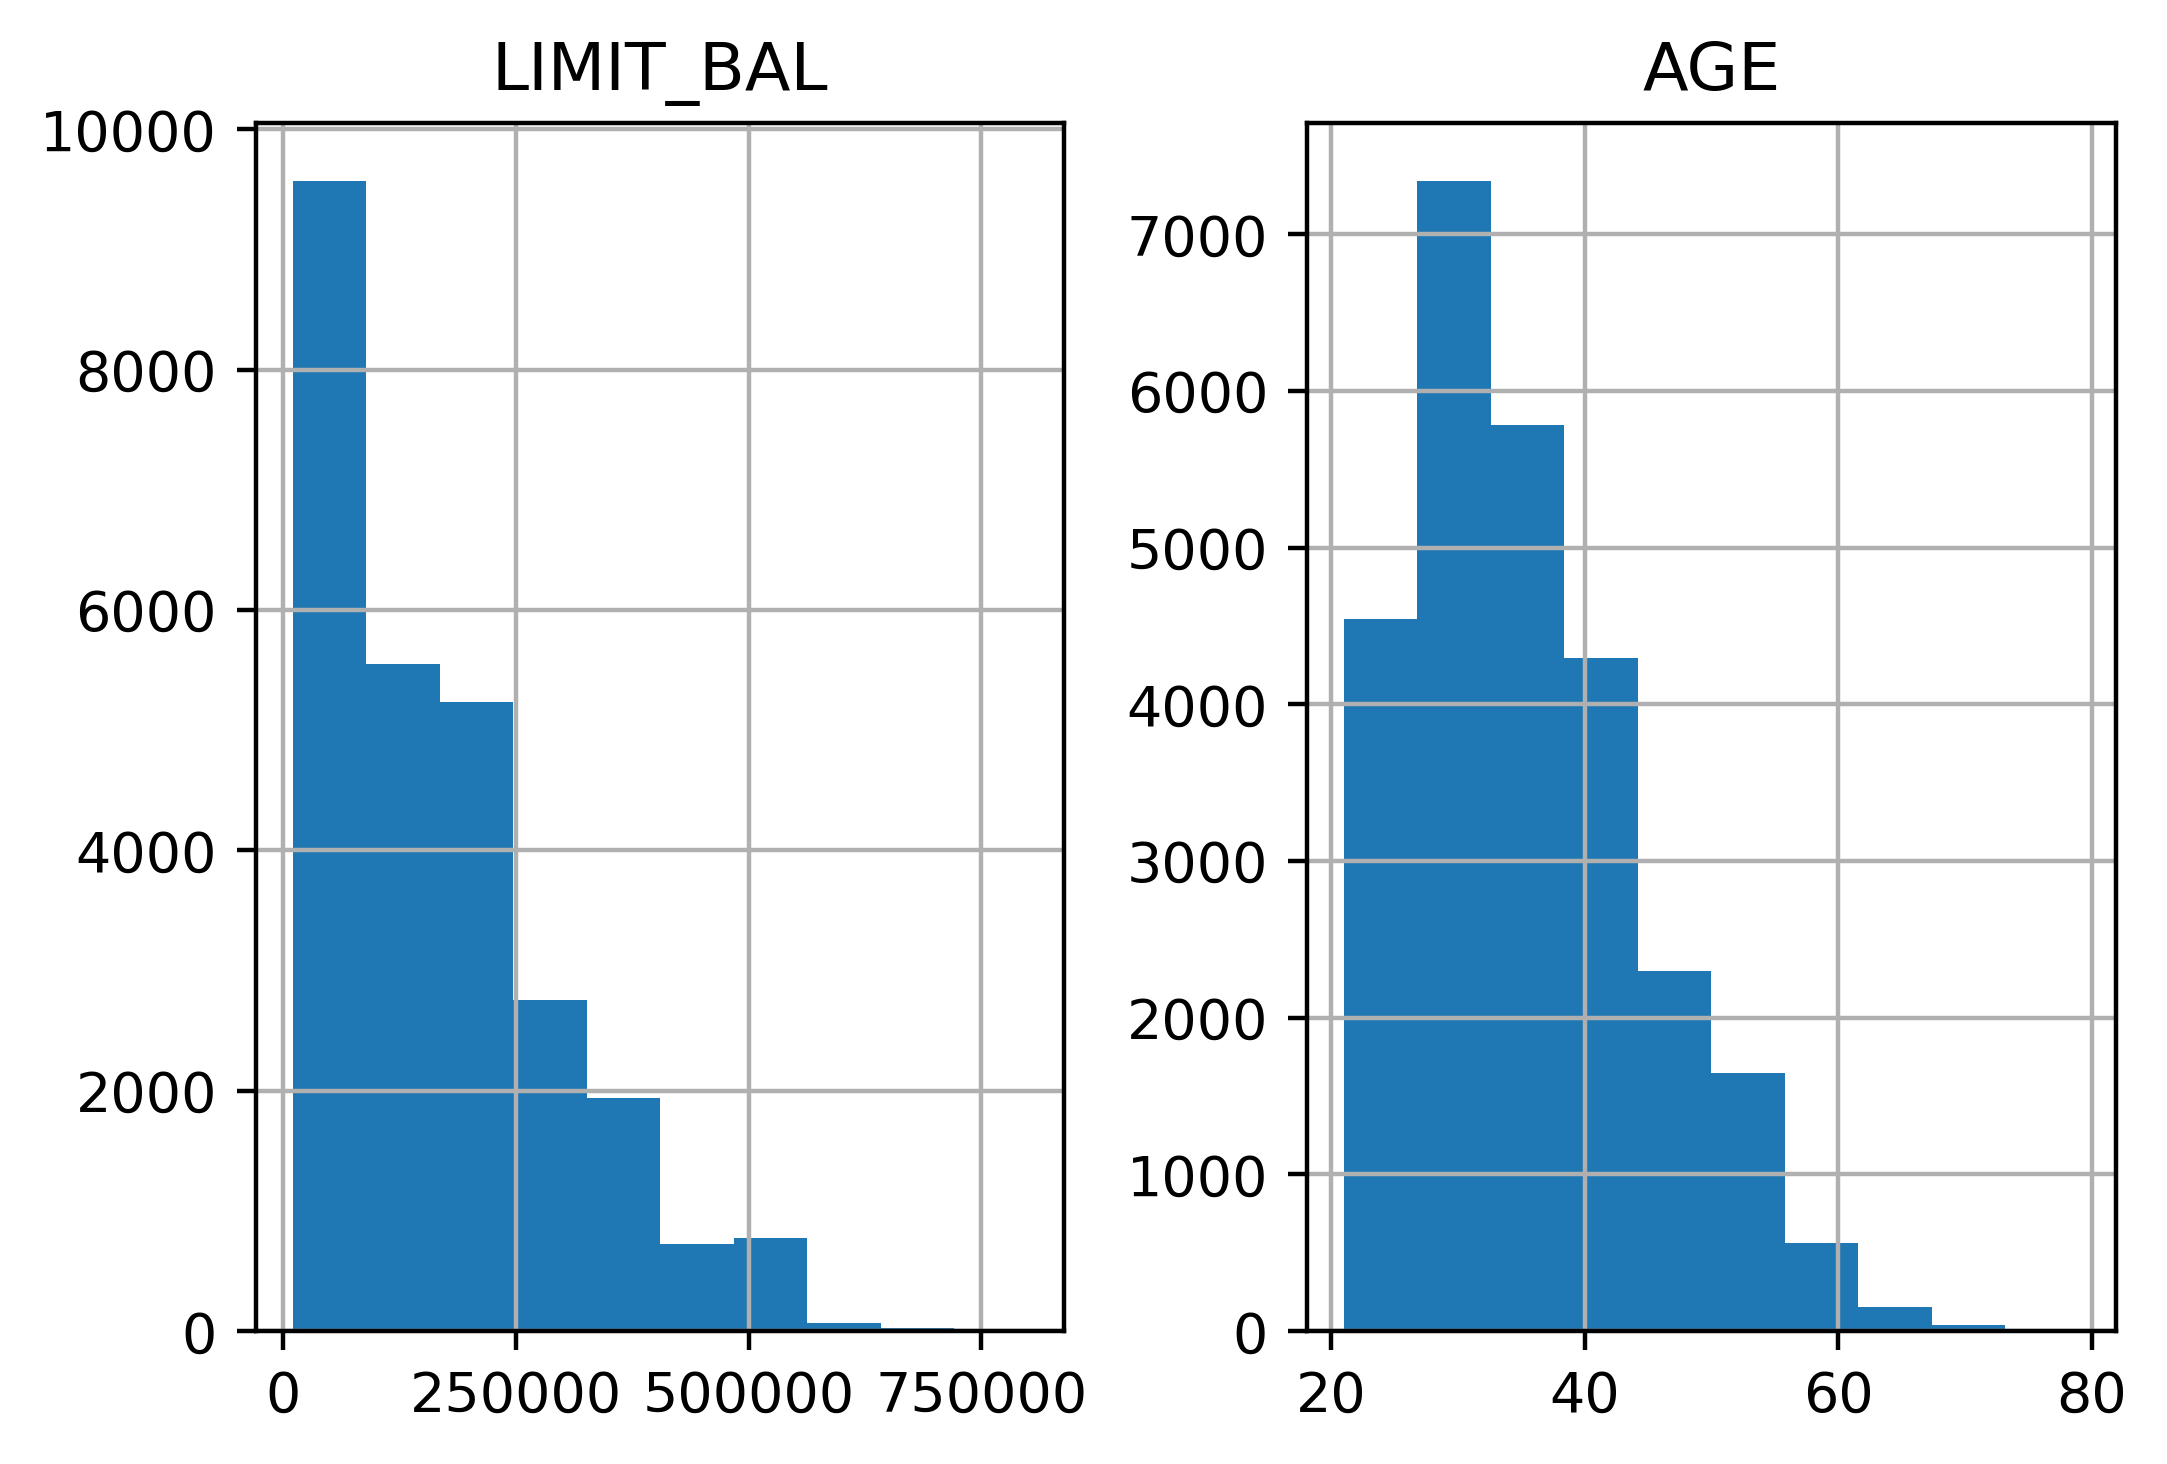

In [19]:
df_clean_2[['LIMIT_BAL', 'AGE']].hist()

LIMIT_BAL, o limite de crédito, parece fazer sentido! Os limites possuem um mínimo de 10.000. Esse é um dataset de Taiwan, a unidade de medida é expressa em NT dollar. A feature AGE também parace bem distribuída e correta, visto que ninguém com menos de 21 anos possuem um cartão de crédito (sendo que por lá essa é a idade mínima para isso. 

Para as variáveis categórias, vamos ver se temos algumas características interessantes.

In [20]:
# Vamos começar pela variável EDUCATION
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
5      245
4      115
6       43
0       11
Name: EDUCATION, dtype: int64

Aqui, podemos ver que alguns valores não estavam na documentação inicial do projeto (1 = Escola funcamental, 2 = Ensino médio, 3 = Faculdade, 4 = Outros). Nesse caso, temos bastantes registros assim e, por coincidência também temos a descrição "Outros". Então, ao invés de removermos vamos apenas reclassificá-los como este.

In [21]:
df_clean_2['EDUCATION'].replace(to_replace=[0, 5, 6],
                               value=4, 
                               inplace=True)
df_clean_2['EDUCATION'].value_counts()

2    12458
1     9412
3     4380
4      414
Name: EDUCATION, dtype: int64

In [22]:
# Agora vamos pela variável "MARRIAGE", situação civil
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      286
0       48
Name: MARRIAGE, dtype: int64

In [23]:
# Aqui temos o mesmo probleminha da feature anterior, onde temos uma categoria que não fazia parte da documentação
# original! portanto, vamos aproveitar novamente essa situação "Outros" hehe
df_clean_2['MARRIAGE'].replace(to_replace=0,
                              value=3,
                              inplace=True)
df_clean_2['MARRIAGE'].value_counts()

2    14158
1    12172
3      334
Name: MARRIAGE, dtype: int64

Quando falamos de variáveis, é importante reforçar que um algoritmo de ML aceita apenas NÚMEROS, por isso temos colunas categóricas como números ao inves de texto. Mas, aqui temos outro ponto muito importante que precisamos aprender e sempre ter em mente: Qual o nível destas variáveis categórias? 

Como nível quero dizer: quantos números representam uma classe diferente daquela categoria. Por exemplo, em "EDUCATION" temos quatro níveis! Em "MARRIAGE" temos três! Este tipo de níveis em variáveis categórias são uma armadilha para algoritmos mais simples. Um exemplo seria a regressão logistica: Como ela traça uma RETA diante a correlação das nossas variáveis, se temos uma distribuição anormal diante de tantos níveis de categorias assim nosso algoritmo acaba tendo uma performance ruim e acaba não resultado de forma correta.

Para estes casos, temos duas soluções: Podemos apelar para um algoritmo mais complexo como DecisionTrees ou RandomForest, ou utiizamos uma técnica chamada "ONE HOT ENCODING", OHE. Vamos visualizar melhor o que acabamos de falar?

Text(0.5, 0, 'Education Level: Ordinal encoding')

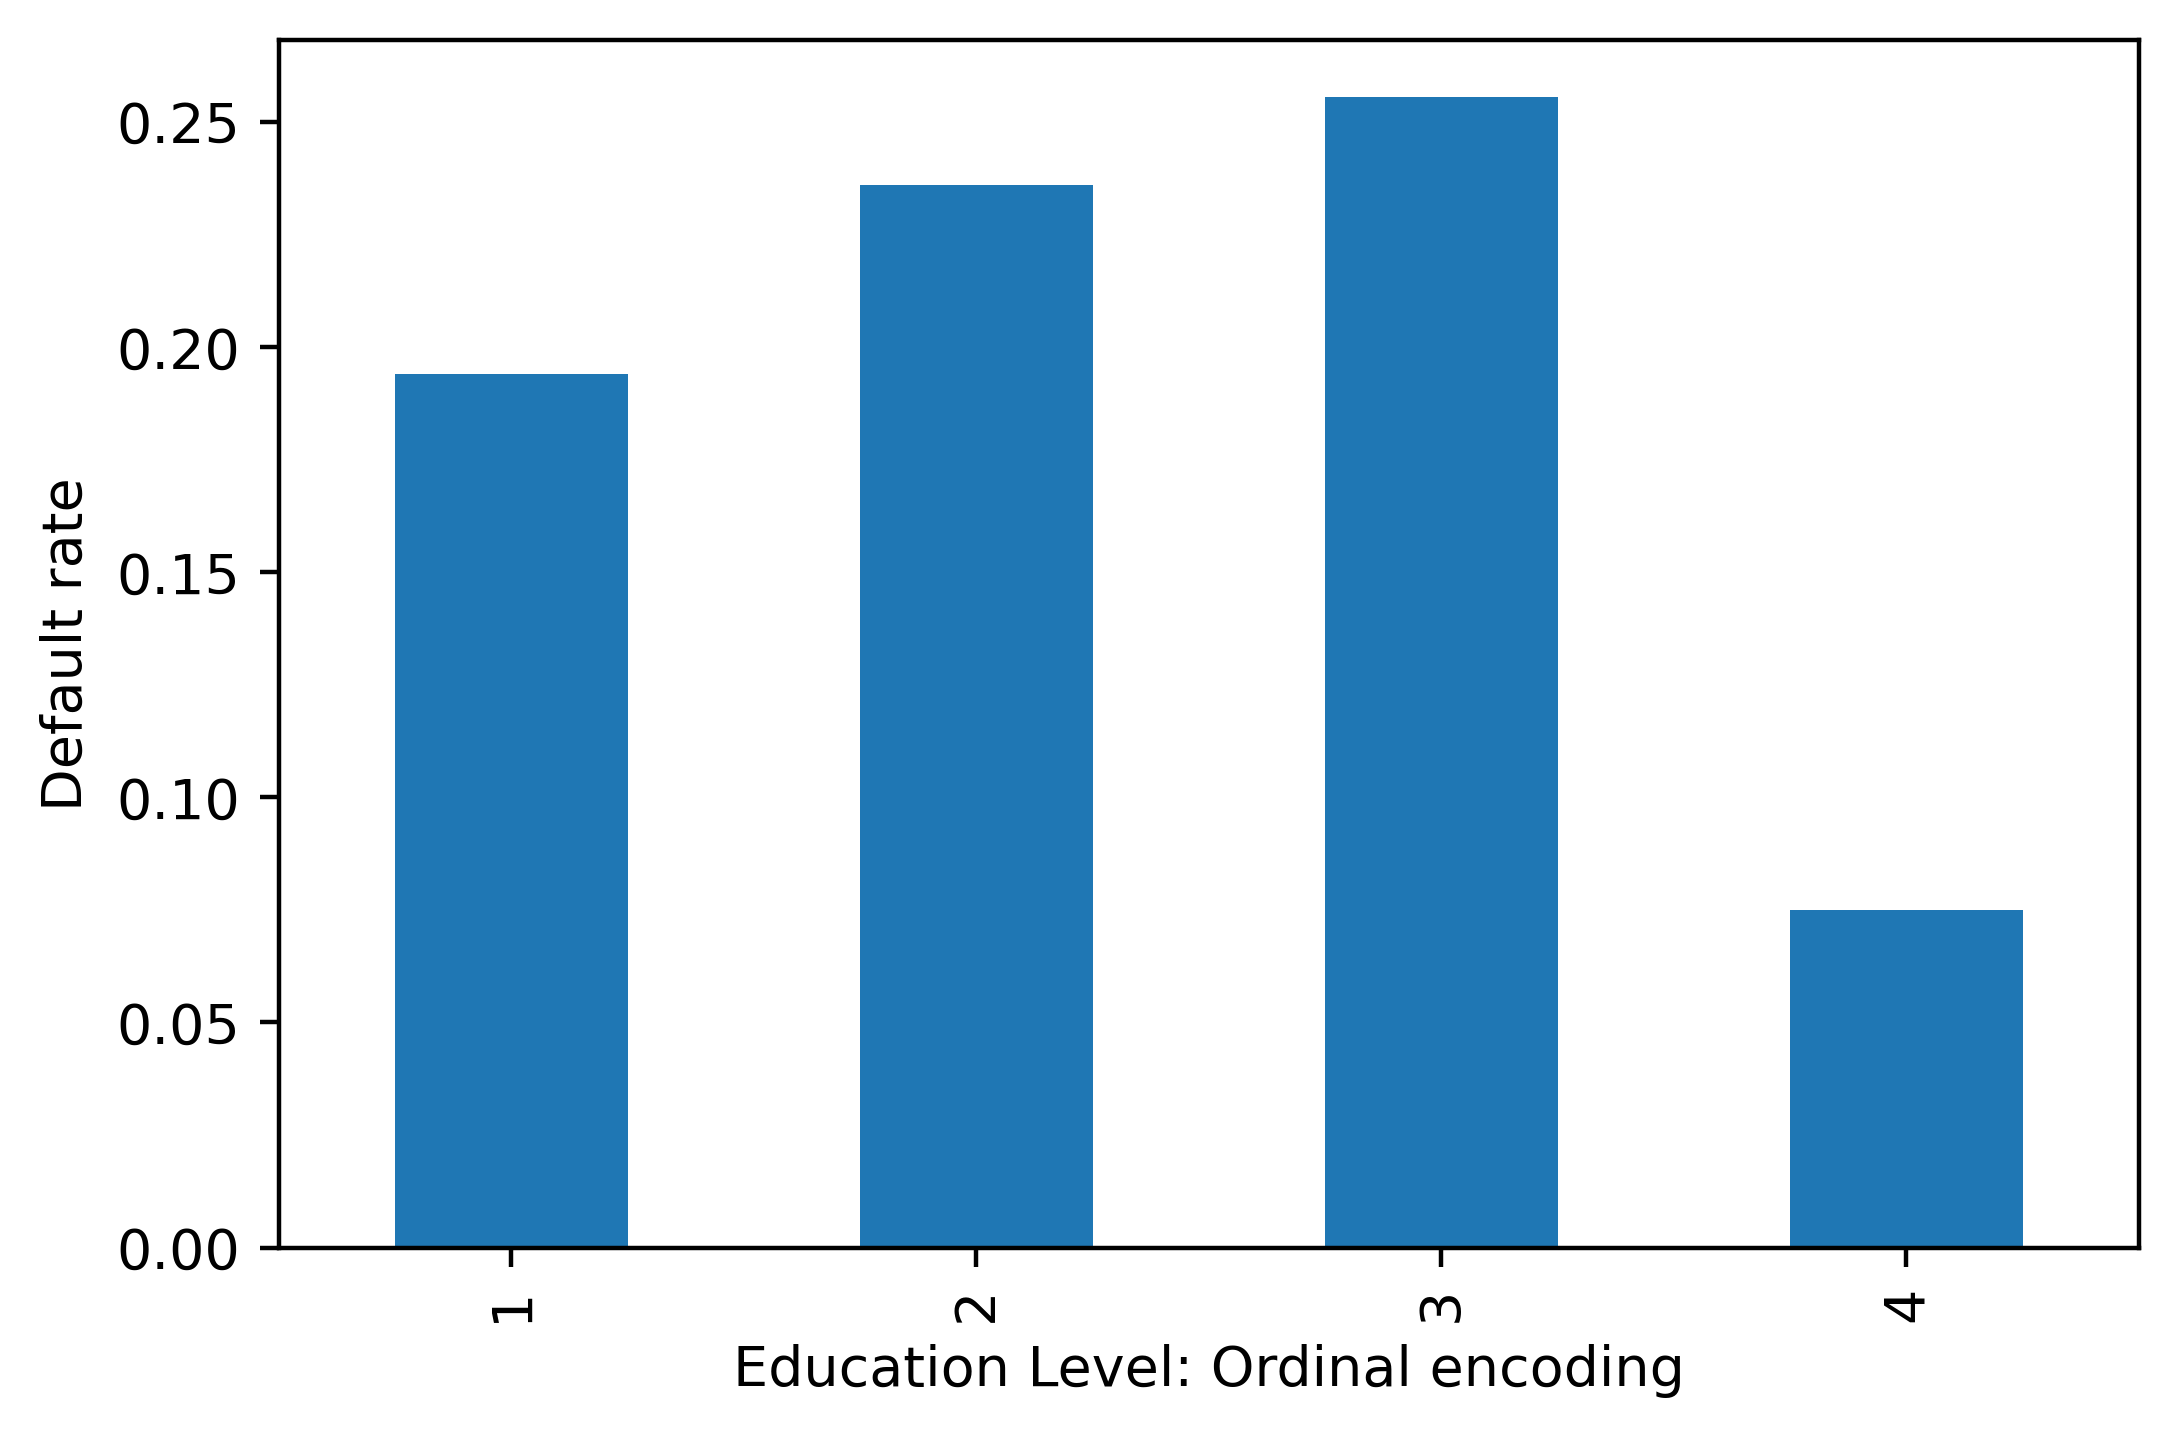

In [24]:
df_clean_2.groupby('EDUCATION').agg({'default payment next month':'mean'}).plot.bar(legend=False)
plt.ylabel('Default rate')
plt.xlabel('Education Level: Ordinal encoding')

In [25]:
df_clean_2['EDUCATION']

0        2
1        2
2        2
3        2
4        2
        ..
29995    3
29996    3
29997    2
29998    3
29999    2
Name: EDUCATION, Length: 26664, dtype: int64

Aqui podemos entender melhor a questão de algoritmos mais simples serem impactados pelos diversos níveis de uma variável. Se traçarmos uma reta neste gráfico, ele não iria desenhar seu formato corretamente. 
Agora, vamos aplicar nossa ténica de OHE?

In [26]:
# Primeiro precisamos fazer uma engenharia reversa para transformar a categoria numerica em texto novamente
mapping = {
    1:"graduate school",
    2:"university",
    3:"high school",
    4:"others"
}

df_clean_2['EDUCATION_CAT'] = df_clean_2['EDUCATION'].map(mapping)
df_clean_2[['EDUCATION_CAT', 'EDUCATION']].head()

,EDUCATION_CAT,EDUCATION
0,university,2
1,university,2
2,university,2
3,university,2
4,university,2


In [27]:
df_clean_2[['EDUCATION_CAT', 'EDUCATION']].head(20)

,EDUCATION_CAT,EDUCATION
0,university,2
1,university,2
2,university,2
3,university,2
4,university,2
5,graduate school,1
6,graduate school,1
7,university,2
8,high school,3
9,high school,3


In [28]:
# OHE pode ser feito com uma função do pandas chamado "get_dummies()"
# Essencialmente ele pega cada valor único e transforma coluna com 0 ou 1
ohe = pd.get_dummies(df_clean_2['EDUCATION_CAT'])
ohe.head()

,graduate school,high school,others,university
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


In [29]:
# Agora vamos juntar com nosso dataframe original só pra vermos como fica
# em uma nova variável
df_with_ohe = pd.concat([df_clean_2, ohe], axis=1)
df_with_ohe[['EDUCATION_CAT', 'graduate school', 'high school', 'university', 'others']].head(10)


,EDUCATION_CAT,graduate school,high school,university,others
0,university,0,0,1,0
1,university,0,0,1,0
2,university,0,0,1,0
3,university,0,0,1,0
4,university,0,0,1,0
5,graduate school,1,0,0,0
6,graduate school,1,0,0,0
7,university,0,0,1,0
8,high school,0,1,0,0
9,high school,0,1,0,0
